# Amazon Review Data Exploration

https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

SAMPLE CONTENT:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_fr.tsv

|DATA COLUMNS:| Description |
|-------------|--------|
|marketplace       | 2 letter country code of the marketplace where the review was written. |
|customer_id       | Random identifier that can be used to aggregate reviews written by a single author. |
|review_id         | The unique ID of the review. |
|product_id        | The unique Product ID the review pertains to. In the multilingual dataset the reviews                    for the same product in different countries can be grouped by the same product_id. |
|product_parent    | Random identifier that can be used to aggregate reviews for the same product. |
|product_title     | Title of the product. |
|product_category  | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
|star_rating       | The 1-5 star rating of the review. |
|helpful_votes     | Number of helpful votes. |
|total_votes       | Number of total votes the review received. |
|vine              | Review was written as part of the Vine program. |
|verified_purchase | The review is on a verified purchase. |
|review_headline   | The title of the review. |
|review_body       | The review text. |
|review_date       | The date the review was written. |

DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.


In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# global variables
COLUMNS_TO_DROP=["marketplace", "vine", "verified_purchase"]
USE_PANDAS=True


# sample file
# DATA_FILE="dataset/amazon_reviews/sample_us.tsv"

# first 10k entries from Wireless category
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_10k.tsv"

# first 500k entries from Wireless category
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_500k.tsv"

# first 1mil entries from Wireless category
DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00_1mil.tsv"

# full 9mil Wireless reviews - not enough memory locally to do this
# DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00.tsv"

# Read using pandas

This doesn't seem to be working if you look down later for analysis for wc from headlines

In [2]:

if USE_PANDAS == True:

    # pandas is doing something weird. The lines that says have bad number of columns actually have the right columns???
    reviews_df = pd.read_csv(DATA_FILE, sep="\t", 
                             parse_dates=["review_date"], 
                             warn_bad_lines=True, 
                             error_bad_lines=False)
    reviews_df.info()

b'Skipping line 51163: expected 15 fields, saw 22\n'
b'Skipping line 77018: expected 15 fields, saw 22\nSkipping line 97528: expected 15 fields, saw 22\n'
b'Skipping line 145503: expected 15 fields, saw 22\nSkipping line 172172: expected 15 fields, saw 22\nSkipping line 185136: expected 15 fields, saw 22\nSkipping line 187592: expected 15 fields, saw 22\n'
b'Skipping line 222158: expected 15 fields, saw 22\nSkipping line 232048: expected 15 fields, saw 22\nSkipping line 232320: expected 15 fields, saw 22\nSkipping line 234653: expected 15 fields, saw 22\nSkipping line 257210: expected 15 fields, saw 22\nSkipping line 261368: expected 15 fields, saw 22\n'
b'Skipping line 262843: expected 15 fields, saw 22\nSkipping line 274082: expected 15 fields, saw 22\nSkipping line 276172: expected 15 fields, saw 22\nSkipping line 327076: expected 15 fields, saw 22\n'
b'Skipping line 328675: expected 15 fields, saw 22\nSkipping line 366744: expected 15 fields, saw 22\nSkipping line 380897: expected 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997929 entries, 0 to 997928
Data columns (total 15 columns):
marketplace          997929 non-null object
customer_id          997929 non-null int64
review_id            997929 non-null object
product_id           997929 non-null object
product_parent       997929 non-null int64
product_title        997929 non-null object
product_category     997929 non-null object
star_rating          997929 non-null int64
helpful_votes        997929 non-null int64
total_votes          997929 non-null int64
vine                 997929 non-null object
verified_purchase    997929 non-null object
review_headline      997928 non-null object
review_body          997729 non-null object
review_date          997927 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 114.2+ MB


# Try reading line by line and see if this will be better

In [3]:
# not quite ready
if USE_PANDAS == False:

    columns = ["marketplace", "customer_id", "review_id", "product_id",
              "product_parent", "product_title", "product_category", 
              "star_rating", "helpful_votes", "total_votes", "vine",
              "verified_purchase", "review_headline", "review_body",
              "review_date"]
    rows = []
    count = 0
    with open(DATA_FILE, "r") as file:
        for line in file:
            line = line.rstrip("\n")
            # skip the header
            if count > 0:
                print(line)
                rows.append(line.split("\t"))
            count += 1
            if count == 3:
                break

    reviews = pd.DataFrame(rows, columns=columns)
    print(len(reviews))
    reviews.head()

In [4]:
# looks like sometimes we have reviews with no body, no headline, and no review dates
# let's drop those rows with missing data
# also drop the following columns since they will always be the same
clean_df = reviews_df.dropna().drop(COLUMNS_TO_DROP, axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997726 entries, 0 to 997928
Data columns (total 12 columns):
customer_id         997726 non-null int64
review_id           997726 non-null object
product_id          997726 non-null object
product_parent      997726 non-null int64
product_title       997726 non-null object
product_category    997726 non-null object
star_rating         997726 non-null int64
helpful_votes       997726 non-null int64
total_votes         997726 non-null int64
review_headline     997726 non-null object
review_body         997726 non-null object
review_date         997726 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 99.0+ MB


count    168976.000000
mean          5.904543
std          28.798156
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        3779.000000
dtype: float64


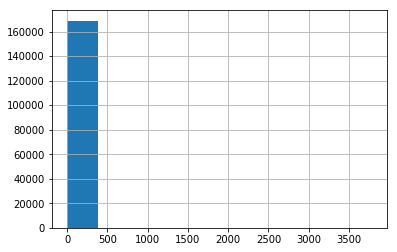

In [5]:
# how many products do we have?
total_products = clean_df.groupby("product_parent").count()
print(clean_df.groupby("product_parent").size().describe())
# 170k products - most only have 1 reviews

clean_df.groupby("product_parent").size().hist()

## ??? I want to filter after group by to see what the day looks like, but this code commented below runs super slow

In [6]:
# ???is there a better way to do this????
# can we do some type of quantile or adaptive binning that would make sense?


# # how many products have 1 reviews
# products_one_review = len(clean_df.groupby("product_parent").filter(lambda x: len(x) == 1).groupby("product_parent"))

# # how many products have 2 to 3 reviews
# products_two_reviews = len(clean_df.groupby("product_parent").filter(lambda x: 2 <= len(x) <= 3).groupby("product_parent"))

# # only 39k products have > 3 reviews
# products_three_plus_reviews = len(clean_df.groupby("product_parent").filter(lambda x: len(x) > 3).groupby("product_parent"))



# print(f"1 review:\t{round(products_one_review/total_products, 2) * 100}% ({products_one_review})")
# print(f"2-3 review:\t {round(products_two_reviews/total_products, 2) * 100}% ({products_two_reviews})")
# print(f"3+ review:\t {round(products_three_plus_reviews/total_products, 2) * 100}% ({products_three_plus_reviews})")



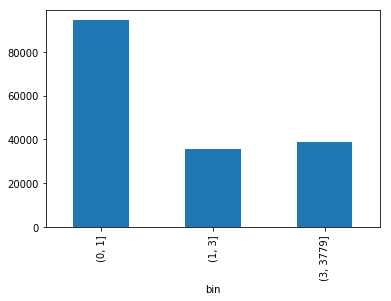

In [7]:
# trying some type of binning

products_df = pd.DataFrame(clean_df.groupby("product_parent").size(), columns=["count"])
products_df = products_df.assign(bin=lambda x: pd.cut(x["count"], [0, 1, 3, x["count"].max()]))
products_df.groupby("bin").size().plot(kind='bar')

# let's look at review distribution dates

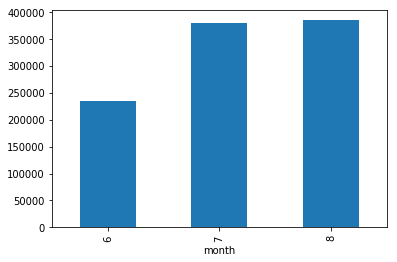

In [8]:
# distribution of months

df = clean_df
df["month"] = df.review_date.dt.month
df.groupby("month").size().plot(kind='bar')

In [9]:
# let's check to see if this is correct

print(df["review_date"].min())
print(df["review_date"].max())

2015-06-10 00:00:00
2015-08-31 00:00:00


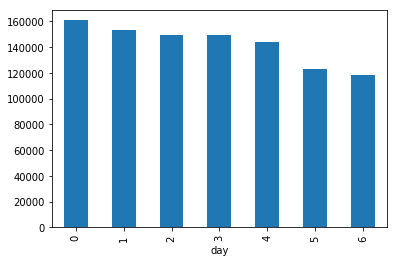

In [10]:
# distribution of days of the week
# distribution of months

df = clean_df
df["day"] = df.review_date.dt.dayofweek
df.groupby("day").size().plot(kind='bar')

# Review Stars Distribution

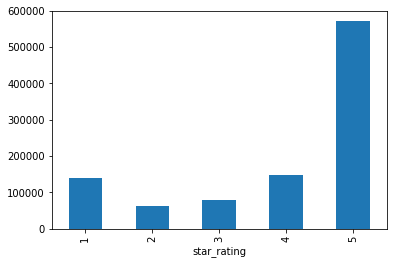

In [11]:
# let's look at distribution of stars
clean_df.groupby("star_rating").size().plot(kind='bar')
# reviews lean heavily towards 5-stars

In [12]:
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.total_votes > 0)]) / len(clean_df), 2)* 100} percent "\
      f"({len(clean_df[(clean_df.total_votes > 0)])}) has votes")
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.helpful_votes > 0)]) / len(clean_df), 2)* 100} percent "\
            f"({len(clean_df[(clean_df.helpful_votes > 0)])}) has helpful votes")


# let's look at distribution of total_votes
clean_df.describe()
# looks like most do not have any votes

21.0 percent (210116) has votes
15.0 percent (153534) has helpful votes


,customer_id,product_parent,star_rating,helpful_votes,total_votes,month,day
count,9.977260e+05,9.977260e+05,997726.000000,997726.000000,997726.000000,997726.000000,997726.000000
mean,2.284734e+07,4.995493e+08,3.952240,0.556236,0.747492,7.150671,2.803965
std,1.657805e+07,2.873581e+08,1.464954,8.317788,9.072997,0.772650,1.969103
min,1.000500e+04,4.830000e+03,1.000000,0.000000,0.000000,6.000000,0.000000
25%,8.750266e+06,2.525092e+08,3.000000,0.000000,0.000000,7.000000,1.000000
50%,2.018955e+07,4.971095e+08,5.000000,0.000000,0.000000,7.000000,3.000000
75%,3.817300e+07,7.468628e+08,5.000000,0.000000,0.000000,8.000000,4.000000
max,5.309655e+07,9.999930e+08,5.000000,3005.000000,3018.000000,8.000000,6.000000


# Review Headlines

Looks like the most frequent number of words in headline is 2

50% have 2700 words or less in headlines

count        37.000000
mean      26965.567568
std       80403.225160
min           1.000000
25%         106.000000
50%        2688.000000
75%       25224.000000
max      486073.000000
dtype: float64


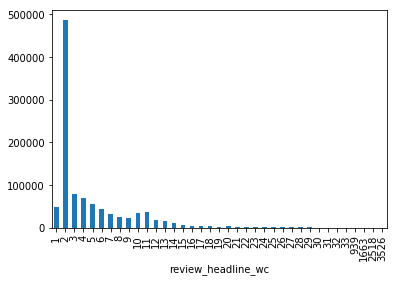

In [13]:
# let's look at wordcount for headlines
df = clean_df
# this doesn't work
# df = df.apply(review_headline_wc=lambda x: len(x["review_headline"].str.split()))
# this doesn't work either - seems to be applying split across all headlines
# df["review_headline_wc"] = df["review_headline"].str.split().count()


df["review_headline_wc"] = df["review_headline"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_headline_wc")
print(grouped.size().describe())

grouped.size().plot(kind='bar')

In [14]:
grouped.size()

review_headline_wc
1        47572
2       486073
3        78116
4        68397
5        54827
6        44318
7        31788
8        25224
9        21727
10       35099
11       36152
12       17164
13       14284
14        9978
15        6187
16        4495
17        3408
18        2688
19        2291
20        2846
21        2041
22         709
23         643
24         514
25         417
26         363
27         216
28         106
29          52
30          18
31           6
32           2
33           1
939          1
1663         1
2518         1
3526         1
dtype: int64

## Interesting.. I don't think Pandas is reading these rows correctly

In [15]:
df = clean_df
for index, row in df[(df["review_headline_wc"] > 2500)].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')

436470 headline: [5-Star Rating – Was very easy to put on my new Galaxy	&#34;5-Star Rating – Was very easy to put on my new Galaxy. I mis-aligned the screen protector slightly but it was easy to lift it and correct the alignment. No bubbles or other problems.&#34;	2015-07-27
US	26952783	R3O4ERCN3DTXQO	B00SWQV4JA	646700147	MOONCASE Premium PU Leather Slim Flip Bracket Window Case Cover for HTC One M7 Red	Wireless	5	0	0	N	Y	Five Stars	Fast shipping, look nicer than the image, fits well to my HTC M7.	2015-07-27
US	2275966	R3LHVUEFR2AGAE	B00IX5YOG0	963886012	S5 HSERIES CASES, BUDDIBOX	Wireless	5	0	0	N	Y	Five Stars	Great protection I can compare to the OtterBox I definitely purchase from this company again	2015-07-27
US	430034	R2L43OCW0MIK11	B00LXL6ZKO	129044147	Samsung Galaxy S3 S III Mini Original OEM Battery - Non-Retail Packaging - Black (Discontinued by Manufacturer)	Wireless	5	0	0	N	Y	Five Stars	good	2015-07-27
US	45572467	R2TA0FMHIV7E7N	B00ESOMFRA	966614270	iLLumiShield – Samsung Con

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997726 entries, 0 to 997928
Data columns (total 15 columns):
customer_id           997726 non-null int64
review_id             997726 non-null object
product_id            997726 non-null object
product_parent        997726 non-null int64
product_title         997726 non-null object
product_category      997726 non-null object
star_rating           997726 non-null int64
helpful_votes         997726 non-null int64
total_votes           997726 non-null int64
review_headline       997726 non-null object
review_body           997726 non-null object
review_date           997726 non-null datetime64[ns]
month                 997726 non-null int64
day                   997726 non-null int64
review_headline_wc    997726 non-null int64
dtypes: datetime64[ns](1), int64(8), object(6)
memory usage: 121.8+ MB


# Review Body

In [17]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

df.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5



Looks like most 50% of reviews have 6 words or less

At 75% percentile we start seeing reviews with 6+ words

In [18]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_body_wc")
print(grouped.size().describe())

count     1307.000000
mean       763.371079
std       4042.402432
min          1.000000
25%          2.000000
50%          6.000000
75%         51.000000
max      69344.000000
dtype: float64


In [19]:
# let's plot by quantile

quantile_list = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.]
quantiles = df["review_body_wc"].quantile(quantile_list)

print(quantiles)

df = df.assign(review_body_quantile=lambda x: pd.cut(x["review_body_wc"], quantiles.array))
df.head(5)

0.0       1.0
0.1       2.0
0.2       5.0
0.3       8.0
0.4      11.0
0.5      16.0
0.6      23.0
0.7      32.0
0.8      48.0
0.9      82.0
1.0    6537.0
Name: review_body_wc, dtype: float64


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74,"(48.0, 82.0]"
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318,"(82.0, 6537.0]"
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4,"(2.0, 5.0]"
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23,"(16.0, 23.0]"
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5,"(2.0, 5.0]"


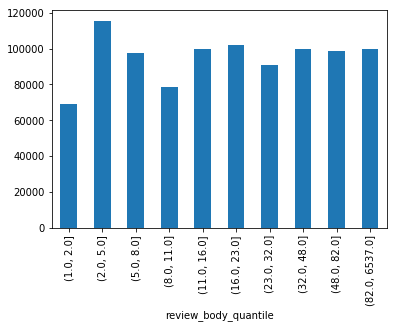

In [20]:
df.groupby("review_body_quantile").size().plot(kind='bar')

In [21]:
# let's try fixed binning - 10 fixed bins

fixed_bin = df.assign(review_body_fixed_bin=lambda x: pd.cut(x["review_body_wc"], 
                                                                   np.arange(0, 7000, 700)))
fixed_bin.head(5)

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,month,day,review_headline_wc,review_body_wc,review_body_quantile,review_body_fixed_bin
0,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31,8,0,4,74,"(48.0, 82.0]","(0, 700]"
1,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31,8,0,4,318,"(82.0, 6537.0]","(0, 700]"
2,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0,0,Five Stars,Fits iPhone 6 well,2015-08-31,8,0,2,4,"(2.0, 5.0]","(0, 700]"
3,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0,0,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31,8,0,2,23,"(16.0, 23.0]","(0, 700]"
4,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0,0,Five Stars,Great for the price :-),2015-08-31,8,0,2,5,"(2.0, 5.0]","(0, 700]"


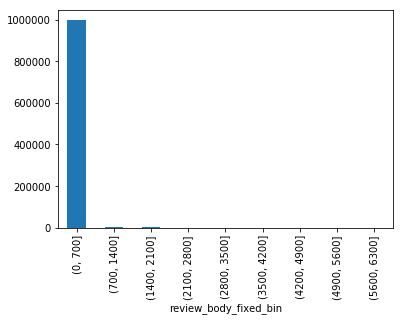

In [22]:
fixed_bin.groupby("review_body_fixed_bin").size().plot(kind='bar')

# Conslusion

looks like Yelp reviews tends to be more verbose than Amazon

90% of Amazon reviews have ~80 words or less compared to yelp reviews which is around ~55%

## Update - 4/25 - Pandas is having issues reading the lines correctly for Amazon reviews so I think some of this data is incorrect

